# <center>Data Mining: Lab2 <center>

### Import Libaries

In [0]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sn
%matplotlib inline

### Import titanic dataset

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
df = pd.read_csv('titanic.csv')
df_dummy = pd.get_dummies(df)
df_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,FamilySize,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,2,7.2500,0,0,0,1,0,0,0,1,0,0,1
1,1,1,38.0,1,0,2,71.2833,1,0,0,0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,7.9250,0,0,1,0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,2,53.1000,1,0,0,0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,1,8.0500,0,0,0,1,0,0,0,1,0,0,1


### Split training data and  test data 

In [0]:
from sklearn.model_selection import train_test_split

outcomename = 'Survived'
X = df_dummy.drop(columns = outcomename)
Y = df_dummy[outcomename]

featurename = X.columns
outcome_value = ["0","1"]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 1234,stratify = Y)
print('training set = {} records, test set= {} records'.format(X_train.shape[0],X_test.shape[0]))

training set = 712 records, test set= 179 records


### StandardScaler (Z-score)


In [0]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)  
X_test_scal = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


***
# <center><font color=purple> Neural Network</font></center>

### Import libraries

__Keras__ is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

In [0]:
! pip install keras_metrics

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras_metrics as eval_matrics
from tensorflow import set_random_seed
from numpy.random import seed

Using TensorFlow backend.


### Set random seed 

In [0]:
seed(1043)
set_random_seed(1043)

### Model config

- __activations__ : softmax, relu, tanh, sigmoid
- __loss functions__ : binary_crossentropy, mean_squared_error
- __optimizer__: SGD, RMSprop, Adam

In [0]:
input_dims = X_train.shape[1]
output_dims = 1

first_layer_node = 8
second_layer_node = 8

activation_f = 'relu'
activation_output = 'sigmoid'

optimizer = 'Adam'
loss_function = 'binary_crossentropy'
eva_matrics = ['accuracy', eval_matrics.binary_precision(), eval_matrics.binary_recall()]

Instructions for updating:
Colocations handled automatically by placer.


### Build model

In [0]:
model = Sequential()
model.add(Dense(first_layer_node, input_dim = input_dims , activation = activation_f))
model.add(Dense(second_layer_node, activation = activation_f))
model.add(Dense(output_dims, activation = activation_output))

model.compile(loss= loss_function, optimizer = optimizer, metrics= eva_matrics) 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


### Train Model

- __Epoch__ : a single step in training a neural network; One Epoch is when an entire dataset is passed forward through the neural network.
- __Batch Size__ : Total number of training examples pass into the neural net at once.
- __Verbose__ : Show the training progress for each epoch. (0 : nothing, 1: show process with animated progress bar , 2 :show process without animated progress bar 



In [0]:
epochs = 200
batch_size = 10 
nn = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, verbose=0)

Instructions for updating:
Use tf.cast instead.


### Prediction 

In [0]:
nn_pred_train = np.ravel(model.predict_classes(X_train))
nn_pred_test = np.ravel(model.predict_classes(X_test))

print('Target classes of the first five rows are {}'.format(y_test.values[0:5]))
print('Predicted classes of the first five rows are {}'.format(nn_pred_test[0:5]))

Target classes of the first five rows are [0 0 0 0 1]
Predicted classes of the first five rows are [0 0 0 0 1]


### Evaluation 

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report, precision_score, recall_score

In [0]:
def cm_plot(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
    classNames = ['Survived','Not Survived']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    plt.grid(None)
    plt.rcParams.update({'font.size': 10})
    plt.rcParams["font.weight"] = "bold"
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [0]:
def plot_metrics(nn,metric):
    plt.figure(figsize=(12, 6))  
    plt.rcParams.update({'font.size': 12})
    plt.plot(nn.history[metric])
    plt.plot(nn.history['val_'+ metric])
    plt.title('Model '+ metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()

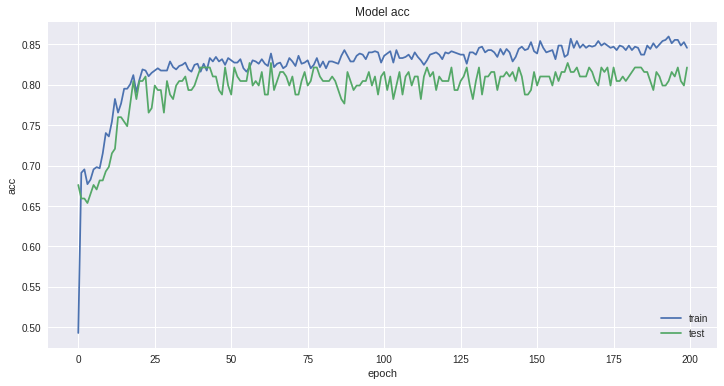

In [0]:
plot_metrics(nn,'acc')

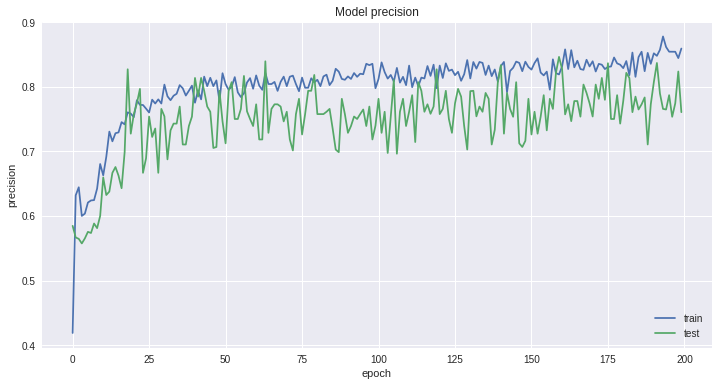

In [0]:
plot_metrics(nn,'precision')

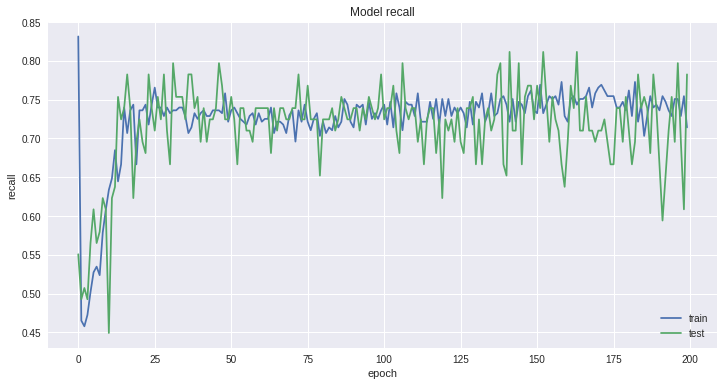

In [0]:
plot_metrics(nn,'recall')

Test set | Accuracy is 82.12290502793296
Test set | Balance Accuracy is 81.40316205533597



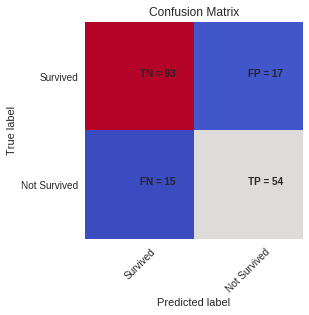

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.76      0.78      0.77        69

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [0]:
test_acc = accuracy_score(y_test,nn_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,nn_pred_test)*100
test_cm = confusion_matrix(y_test,nn_pred_test)
test_report = classification_report(y_test,nn_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
print("")
cm_plot(test_cm)
print(test_report)

***
# <center><font color=purple> ------------------- Clustering ------------------- </font></center>

### Iris flower data set

The data set consists of 50 samples from each of three species of Iris __(Iris setosa, Iris virginica and Iris versicolor)__. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.<br> Based on the combination of these four features, the objective is "To develope model to distinguish the species from each other ".

In [0]:
import pandas as pd
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()
print('First row of iris')
print('Feature_name :', *iris.feature_names)
print('Feature_value :',*iris.data[0])
print('Target :',iris.target[0])

First row of iris
Feature_name : sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
Feature_value : 5.1 3.5 1.4 0.2
Target : 0


### Create Data frame 

In [0]:
target_name = iris.target_names
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris['target'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [0]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
X_iris = df_iris.drop(columns = 'target')
y_iris = df_iris['target']

### StandardScaler (Z-score)

In [0]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_iris)
X_iris = scaler.transform(X_iris)  

###  Scatter Plot 

In [0]:
def normal_scater_plot(x,y): 
    plt.figure(figsize=(8, 4))
    plt.scatter(df_iris[x], df_iris[y], s=20)
    plt.ylabel(x)
    plt.xlabel(y)

def target_scater_plot(x,y):
    plt.figure(figsize=(8, 4))
    plt.scatter(df_iris[x][df_iris.target == 'setosa'],
            df_iris[y][df_iris.target == 'setosa'], s=20 , c='red' ,label = 'setosa')
    plt.scatter(df_iris[x][df_iris.target == 'versicolor'],
            df_iris[y][df_iris.target == 'versicolor'], s=20 , c='blue',label = 'versicolor')
    plt.scatter(df_iris[x][df_iris.target == 'virginica'],
            df_iris[y][df_iris.target == 'virginica'], s=20 , c='green',label = 'virginica')
    plt.legend()
    plt.ylabel(x)
    plt.xlabel(y)
    
def cluster_scater_plot(x,y,cluster,color):
    clust = np.unique(cluster)
    l = len(clust)
    l_c = len(color)
    assert l == l_c , 'No.cluster is not equal No.color'
    plt.figure(figsize=(8, 4))
    for i in range(0,l):   
        plt.scatter(df_iris[x][cluster == clust[i]],
                    df_iris[y][cluster == clust[i]], s=20 , c = color[i] ,label = clust[i])
        
    plt.legend()
    plt.ylabel(x)
    plt.xlabel(y)

### <font color = 'pink'>Petal length (cm)</font> vs   <font color = 'lightblue'> Petal width (cm)</font>

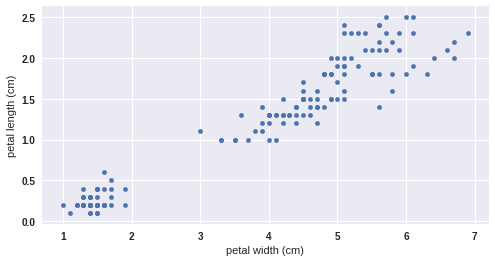

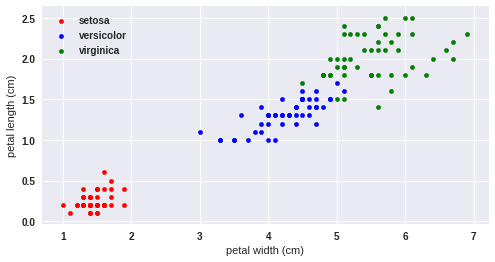

In [0]:
normal_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)')
target_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)')

***
# <center><font color=purple> K-means clustering </font></center>

In [0]:
from sklearn.cluster import KMeans

__Parameter__
- __n_clusters (default: 8)__ : The number of clusters to form as well as the number of centroids to generate.

- __init (defaults: ‘k-means++’)__ : Method for initialization<br>
'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. [For more details](https://en.wikipedia.org/wiki/K-means%2B%2B).<br>
'random' : choose k observations (rows) at random from data for the initial centroids.
- __max_iter (default: 300)__ : Maximum number of iterations of the k-means algorithm for a single run.
- __random_state (default: None)__ : Determines random number generation for centroid initialization

### Training model 

In [0]:
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans = kmeans_model.fit(X_iris)

###  Prediction

In [0]:
kmeans_pred = kmeans.predict(X_iris)
print('Predicted clusters of the first five rows are {}'.format(kmeans_pred[0:5]))

Predicted clusters of the first five rows are [1 1 1 1 1]


### Cluster Plot

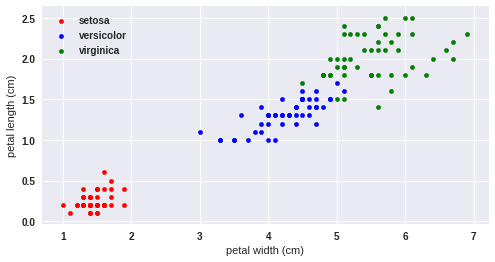

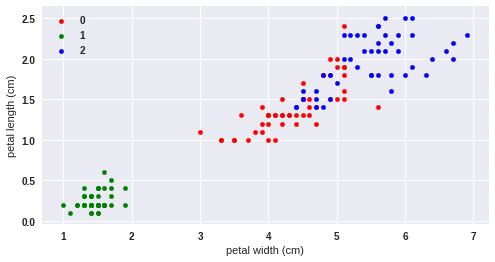

In [0]:
target_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)')
col = ['red','green','blue']
cluster_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)', cluster= kmeans_pred,color=col)

### n_clusters = 5

In [0]:
n_clusters = 5
####
kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
kmeans = kmeans_model.fit(X_iris)
kmeans_pred = kmeans.predict(X_iris)

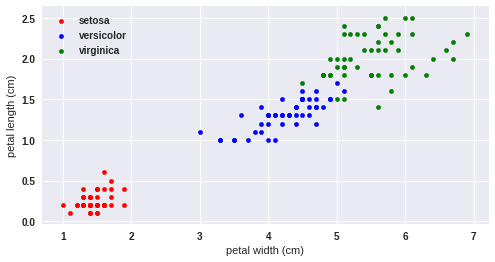

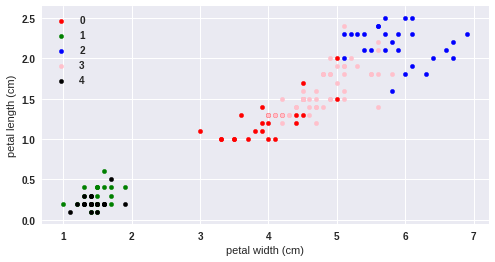

In [0]:
target_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)')
col = ['red','green','blue','pink','black']
cluster_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)', cluster= kmeans_pred, color=col)

### Within cluster sum of squares distance ( n_clusters = 2,3,..,10 )

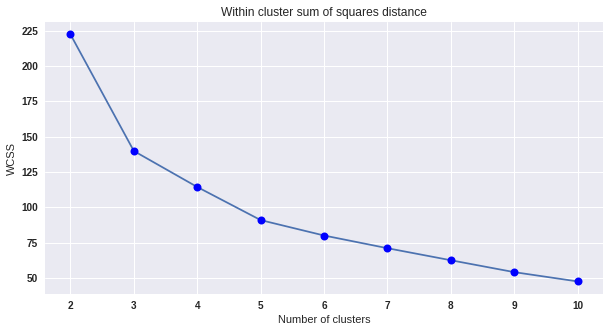

In [0]:
n_start = 2
n_end = 10

wcss = []
for i in range(n_start, n_end + 1):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(n_start, n_end + 1), wcss,marker='o',  
         markerfacecolor='blue', markersize=8)
plt.title('Within cluster sum of squares distance')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares 
plt.show()

### Silhouette
See full details about function, Python packages [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [0]:
def silhouette_plot(X_data,range_n_clusters):
  from sklearn.cluster import KMeans
  from sklearn.metrics import silhouette_samples, silhouette_score
  import matplotlib.pyplot as plt
  import matplotlib.cm as cm
  import numpy as np

  for n in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 4)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_data) + (n_clusters + 1) * 10])
    
    kmeans_model = KMeans(n_clusters=n, random_state=0)
    kmeans = kmeans_model.fit_predict(X_data)
    silhouette_avg = silhouette_score(X_data, kmeans)
    print("For n_clusters =", n, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X_data, kmeans)
    
    y_lower = 10
    for i in range(n):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    x_feature = 2
    y_feature = 3

    colors = cm.nipy_spectral(kmeans.astype(float) / len(kmeans_model.cluster_centers_))
    ax2.scatter(X_data[:, x_feature], X_data[:, y_feature], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    centers = kmeans_model.cluster_centers_
    ax2.scatter(centers[:, x_feature], centers[:, y_feature], marker='o',c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[x_feature], c[y_feature], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 3rd feature: petal width")
    ax2.set_ylabel("Feature space for the 4th feature: petal length")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n), fontsize=14, fontweight='bold')
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5817500491982808


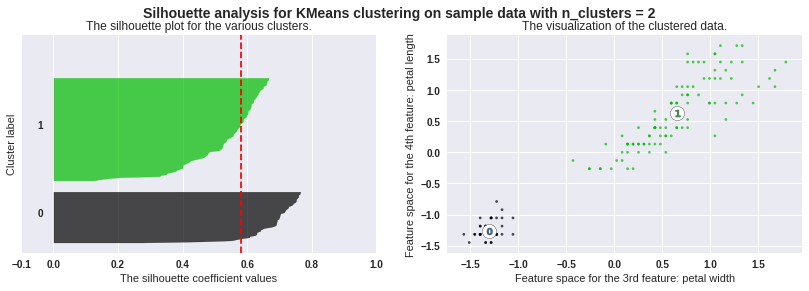

For n_clusters = 3 The average silhouette_score is : 0.45994823920518646


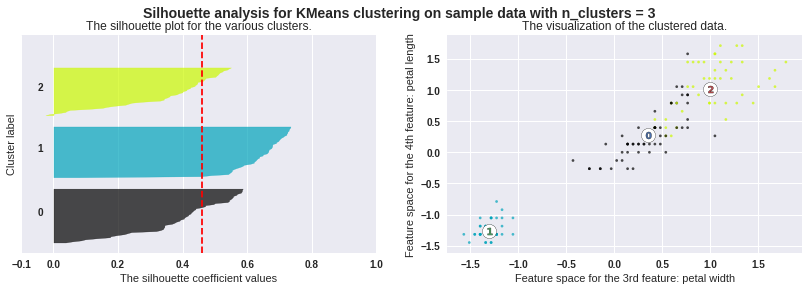

For n_clusters = 4 The average silhouette_score is : 0.3850454053045392


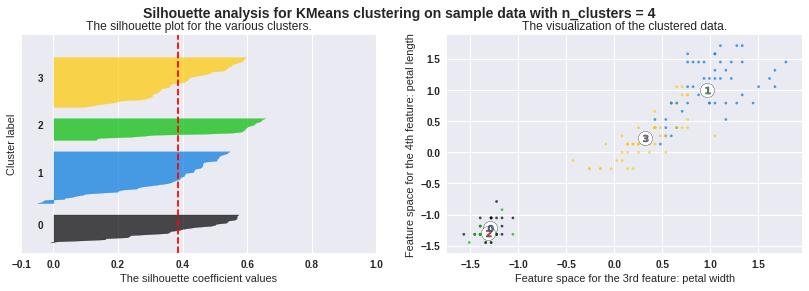

For n_clusters = 5 The average silhouette_score is : 0.3459012795948778


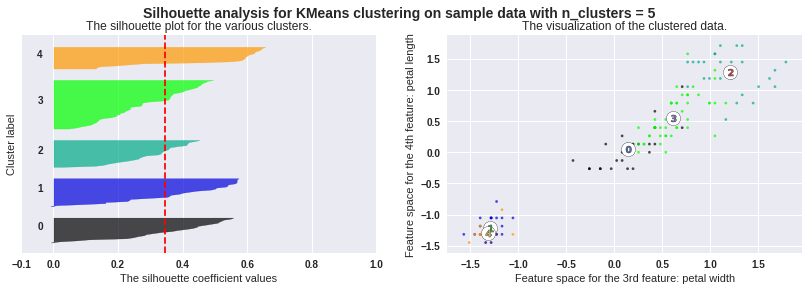

For n_clusters = 6 The average silhouette_score is : 0.32203661257077404


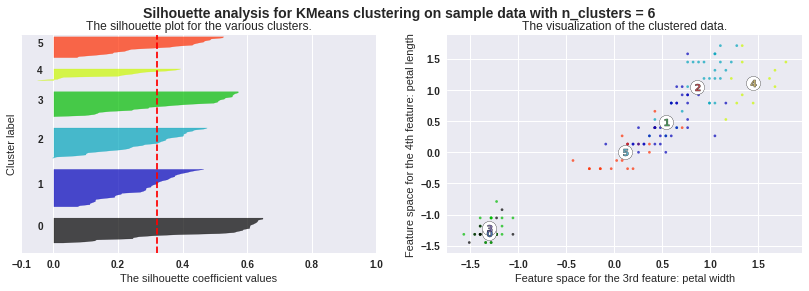

In [0]:
range_n_clusters = [2,3,4,5,6]
#range_n_clusters = range(2, 7)
silhouette_plot(X_iris,range_n_clusters)

***
# <center><font color=purple> Mean shift clustering </font></center>
Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

In [0]:
from sklearn.cluster import MeanShift
MeanShift()

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

- __bandwidth__ : Bandwidth used in the RBF kernel.
- __seeds__ : Seeds used to initialize kernels
- __cluster_all__ : If true, then all points are clustered,

### Training model

In [0]:
MeanShift_model = MeanShift(bandwidth=2)
MeanShift_model = MeanShift_model.fit(X_iris)

### Prediction

In [0]:
MeanShift_pred = MeanShift_model.fit_predict(X_iris)
print('No.cluster :', len(np.unique(MeanShift_pred)))
print('Predicted clusters of the first five rows are {}'.format(MeanShift_pred[0:5]))

No.cluster : 2
Predicted clusters of the first five rows are [1 1 1 1 1]


### Plot

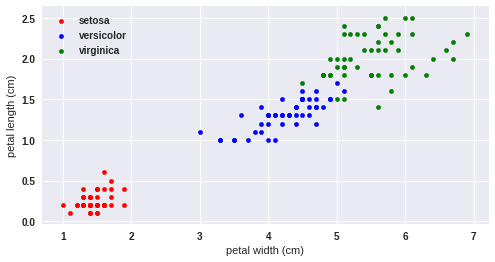

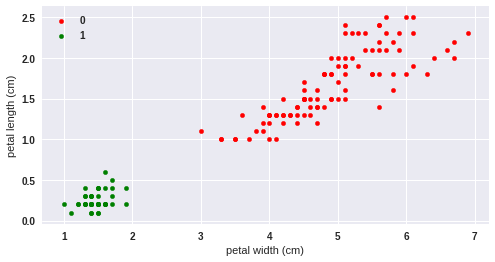

In [0]:
target_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)')
col = ['red','green']
cluster_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)', cluster= MeanShift_pred,color=col)

***
# <center><font color=purple> Density-Based Spatial Clustering of Applications with Noise clustering (DBCSAN) </font></center>

In [0]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

- __eps__ :  The maximum distance between two samples for them to be considered as in the same neighborhood.
- __min_samples__ : The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
- __metric__ : The metric to use when calculating distance between instances in a feature array.

### Training Model

In [0]:
DBSCAN_model = DBSCAN(eps=0.5, min_samples=5)
DBSCAN_model = DBSCAN_model.fit(X_iris)

### Prediction

In [0]:
DBSCAN_pred = DBSCAN_model.fit_predict(X_iris)
print('No.cluster :', len(np.unique(DBSCAN_pred)))
print('Predicted clusters of the first five rows are {}'.format(DBSCAN_pred[0:5]))

No.cluster : 3
Predicted clusters of the first five rows are [0 0 0 0 0]


### Plot

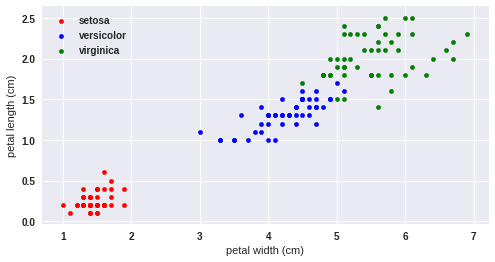

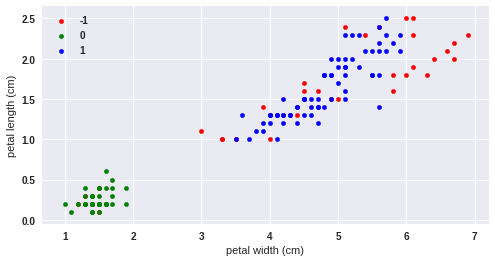

In [0]:
target_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)')
col = ['red','green','blue']
cluster_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)', cluster= DBSCAN_pred,color=col)

***
# <center><font color=purple> Gaussian Mixture Models (GMM) </font></center>

In [0]:
from sklearn.mixture import GaussianMixture
GaussianMixture()

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

- __n_components (defaults : 1)__ : The number of mixture components.
- __tol (defaults : 1e-3)__ : The convergence threshold. EM iterations will stop when the lower bound average gain is below this threshold.
- __max_iter (defaults to 100)__ : The number of EM iterations to perform

### Training Model

In [0]:
GMM_model = GaussianMixture(n_components=3)
GMM_model = GMM_model.fit(X_iris)

### Prediction

In [0]:
GMM_pred = GMM_model.fit_predict(X_iris)
print('No.cluster :', len(np.unique(GMM_pred)))
print('Predicted clusters of the first five rows are {}'.format(GMM_pred[0:5]))

No.cluster : 3
Predicted clusters of the first five rows are [2 2 2 2 2]


### Plot

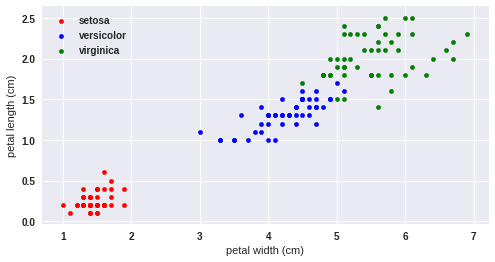

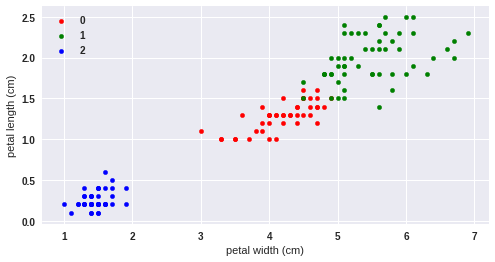

In [0]:
target_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)')
col = ['red','green','blue']
cluster_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)', cluster= GMM_pred,color=col)

***
# <center><font color=purple> Agglomerative Clustering </font></center>

In [0]:
from sklearn.cluster import AgglomerativeClustering
AgglomerativeClustering()

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

- __n_clusters (default=2)__ : The number of clusters to find.
- __affinity (default: “euclidean”)__ : Metric used to compute the linkage. It can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’

### Training model

In [0]:
Agg_model = AgglomerativeClustering(n_clusters=3)
Agg_model = Agg_model.fit(X_iris)

### Prediction

In [0]:
Agg_pred = Agg_model.fit_predict(X_iris)
print('No.cluster :', len(np.unique(Agg_pred)))
print('Predicted clusters of the first five rows are {}'.format(Agg_pred[0:5]))

No.cluster : 3
Predicted clusters of the first five rows are [1 1 1 1 1]


### Plot

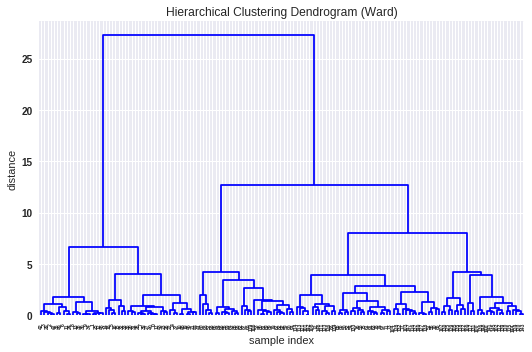

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_iris, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

### Show only the last p merged clusters

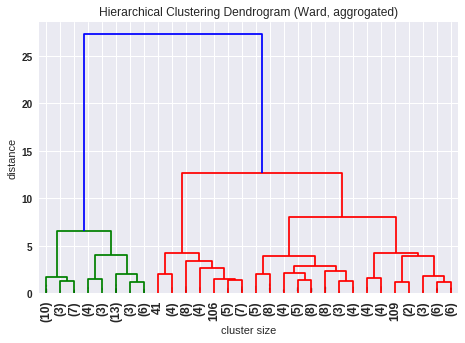

In [0]:
p = 30

###########
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p= p,                   # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

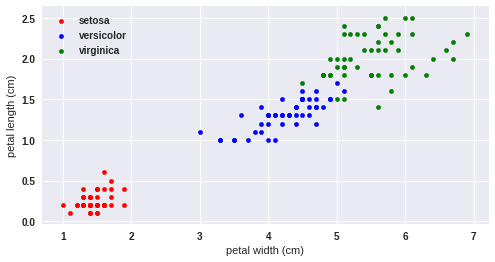

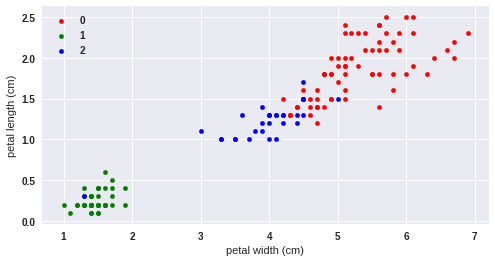

In [0]:
target_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)')
col = ['red','green','blue']
cluster_scater_plot(x = 'petal length (cm)', y = 'petal width (cm)', cluster= Agg_pred,color=col)

***
# <center><font color=purple> ------------------- Basket Analysis  -------------------</font></center>

### Online Retail Data Set 
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

Source: UCL and  Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

### Import dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Germany_retail.csv to Germany_retail.csv


In [0]:
retail = pd.read_csv('Germany_retail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany


### Reshape dataset

In [0]:
basket = retail.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
basket.head(15)

InvoiceNo  Description                        
536527     3 HOOK HANGER MAGIC GARDEN             12
           5 HOOK HANGER MAGIC TOADSTOOL          12
           5 HOOK HANGER RED MAGIC TOADSTOOL      12
           ASSORTED COLOUR LIZARD SUCTION HOOK    24
           CHILDREN'S CIRCUS PARADE MUG           12
           HOMEMADE JAM SCENTED CANDLES           12
           HOT WATER BOTTLE BABUSHKA               4
           JUMBO BAG OWLS                         10
           JUMBO BAG WOODLAND ANIMALS             10
           MULTI COLOUR SILVER T-LIGHT HOLDER     12
           PACK 3 FIRE ENGINE/CAR PATCHES         12
           PICTURE DOMINOES                       12
           POSTAGE                                 1
           ROTATING SILVER ANGELS T-LIGHT HLDR     6
           SET OF 6 T-LIGHTS SANTA                 6
Name: Quantity, dtype: int64

In [0]:
basket = basket.unstack().fillna(0)
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Positive values are converted to a 1 and anything else is set to 0

In [0]:
encode = lambda x : 0 if x == 0 else 1
basket_sets = basket.applymap(encode)

### Drop POSTAGE column (charge)

In [0]:
basket_sets.drop('POSTAGE', inplace = True, axis = 1) # axis = 1 means by column
#basket_sets.drop(columns = 'POSTAGE')

***
## <center><font color=purple> Association_rules </font></center>

In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

__Apriori__ is a popular algorithm for extracting frequent itemsets with applications in association rule learning. <br>
__parameter__ 
- __df__ : dats table
- __min_support__ : minimun support 
- __use_colnames__: show columns name in result.

### Frequent item sets that have a support of at least 5%

In [0]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.061269,(COFFEE MUG APPLES DESIGN)
5,0.063457,(FAWN BLUE HOT WATER BOTTLE)
6,0.072210,(GUMBALL COAT RACK)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.063457,(JAM JAR WITH PINK LID)
9,0.091904,(JAM MAKING SET PRINTED)


In [0]:
pd.set_option('max_colwidth', 800)
frequent_itemsets.tail(10)

,support,itemsets
49,0.067834,(WOODLAND PARTY BAG + STICKER SET)
50,0.067834,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TIN WOODLAND ANIMALS)"
51,0.050328,"(PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF 4 FRUITS)"
52,0.056893,"(PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND)"
53,0.061269,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOODLAND ANIMALS)"
54,0.074398,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN WOODLAND ANIMALS)"
55,0.059081,"(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOTTE BAG)"
56,0.131291,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)"
57,0.070022,"(ROUND SNACK BOXES SET OF4 WOODLAND, SPACEBOY LUNCH BOX)"
58,0.063457,"(ROUND SNACK BOXES SET OF4 WOODLAND, WOODLAND CHARLOTTE BAG)"


### Sort itemset by Size of itemset and support

In [0]:
pd.set_option('max_colwidth', 800)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets.sort_values(by=['length','support'],ascending=False)
frequent_itemsets.head()

,support,itemsets,length
56,0.131291,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)",2
54,0.074398,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN WOODLAND ANIMALS)",2
57,0.070022,"(ROUND SNACK BOXES SET OF4 WOODLAND, SPACEBOY LUNCH BOX)",2
50,0.067834,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TIN WOODLAND ANIMALS)",2
58,0.063457,"(ROUND SNACK BOXES SET OF4 WOODLAND, WOODLAND CHARLOTTE BAG)",2


### Generate the rules with Corresponding support, confidence and lift

In [0]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by = 'lift',ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
12,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.126915,0.070022,0.059081,0.465517,6.648168,0.050194,1.739959
6,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
10,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
